[View in Colaboratory](https://colab.research.google.com/github/Saintat1/Kaggle/blob/master/salt_detection.ipynb)

In [7]:
!pip install torch
!pip install imageio

    100% |████████████████████████████████| 519.5MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58c42000 @  0x7fb26b09a1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 3.3MB 6.3MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio


In [0]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import torch

from torch.utils import data

In [0]:
class TGSSaltDataset(data.Dataset):
  
  def __init__(self, root_path, file_list):
    self.root_path = root_path
    self.file_list = file_list
    
  def __len__(self):
    return len(self.file_list)
  
  def __getitem__(self, index):
    if index not in range(0, len(self.file_list)):
      return self.__getitem__(np.random.ranint(0 , self.__len__()))
    
    file_id = self.file_list[index]
    
    image_folder = os.path.join(self.root_path, "images")
    image_path = os.path.join(image_folder, file_id + ".png")
    
    mask_folder = os.path.join(self.root_path, "masks")
    mask_path = os.path.join(mask_folder, file_id + ".png")
    
    image = np.array(imageio.imread(image_path), dtype = np.uint8)
    mask = np.array(imageio.imread(mask_path), dtype = np.uint8)
    
    return image, mask

In [1]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 235kB 4.3MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saintat1","key":"eb206386922d551863ecf124af8776d7"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Sep 11 15:11 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 68.7MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 78.1MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 133MB/s]
 94% 154M/163M [00:00<00:00, 190MB/s]
100% 163M/163M [00:00<00:00, 216MB/s]
 95% 36.0M/37.9M [00:00<00:00, 135MB/s]
100% 37.9M/37.9M [00:00<00:00, 188MB/s]


In [9]:
!ls
!unzip train.zip

depths.csv   sample_data	    test.zip   train.zip
kaggle.json  sample_submission.csv  train.csv
Archive:  train.zip
   creating: images/
   creating: masks/
  inflating: images/8d08955cdf.png   
  inflating: images/e045664b46.png   
  inflating: images/4989c6509e.png   
  inflating: images/fff4eb4941.png   
  inflating: images/3a310860a3.png   
  inflating: images/7a696bb878.png   
  inflating: images/8d3ee9356b.png   
  inflating: images/213e0a9f7b.png   
  inflating: images/78f17697f2.png   
  inflating: images/bd20d18369.png   
  inflating: images/de08c5a3b7.png   
  inflating: images/f06ef6c8b7.png   
  inflating: images/b2d02516e1.png   
  inflating: images/5edb37f5a8.png   
  inflating: images/b1f0e104f5.png   
  inflating: images/40e8e14e60.png   
  inflating: images/6e1444d88d.png   
  inflating: images/f342603c76.png   
  inflating: images/7ba58ee1be.png   
  inflating: images/14a89a1840.png   
  inflating: images/4319885cf1.png   
  inflating: images/bb697642ae.png   
  infla

In [0]:
train_mask = pd.read_csv('train.csv')
depth = pd.read_csv('depths.csv')
train_path = "./"

file_list = list(train_mask['id'].values)
dataset = TGSSaltDataset(train_path, file_list)

In [13]:
type(train_mask['rle_mask'][1])

str

In [0]:
def plot2x2Array(image,mask):
  f, axarr = plt.subplots(1,2)
  axarr[0].imshow(image)
  axarr[1].imshow(mask)
  axarr[0].grid()
  axarr[1].grid()
  axarr[0].set_title('Image')
  axarr[1].set_title('Mask')

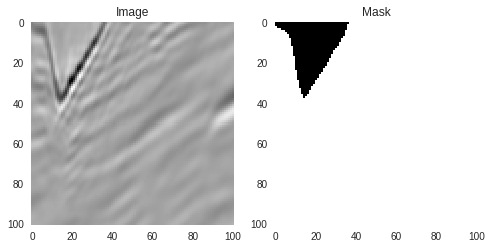

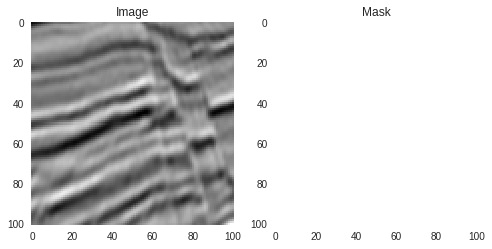

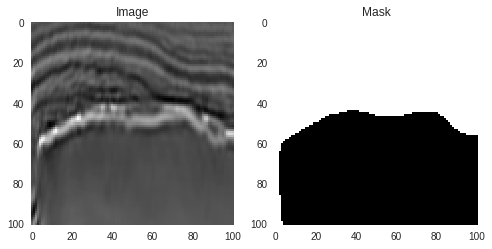

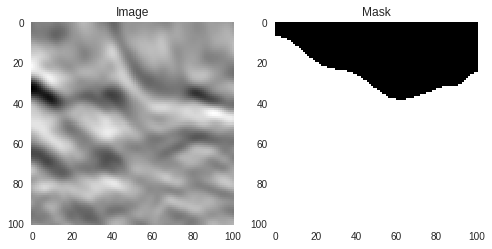

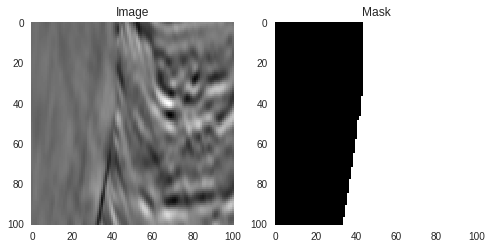

In [15]:
for i in range(5):
  image, mask = dataset[np.random.randint(0,len(dataset))]
  plot2x2Array(image, mask)

Text(0.5,1,'Depth distribution')

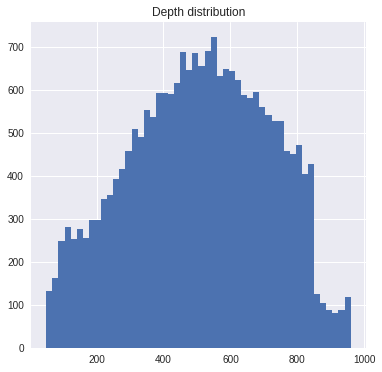

In [16]:
plt.figure(figsize = (6, 6))
plt.hist(depth['z'], bins = 50)
plt.title('Depth distribution')

In [0]:
def rleToMask(rleString,height,width):
    #width heigh
    rows,cols = height,width
    try:
        #get numbers
        rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
        #get pairs
        rlePairs = np.array(rleNumbers).reshape(-1,2)
        #create an image
        img = np.zeros(rows*cols,dtype=np.uint8)
        #for each pair
        for index,length in rlePairs:
            #get the pixel value 
            index -= 1
            img[index:index+length] = 255
        
        
        #reshape
        img = img.reshape(cols,rows)
        img = img.T
        
        print(rleString)
    
    #else return empty image
    except:
        img = np.zeros((cols,rows))
    
    print(img)
    
    return img

In [0]:
def salt_proportion(imgArray):
  #print(imgArray)
  unique, counts = np.unique(imgArray, return_counts=True)
  print(unique)
  print(counts)
  try:
    unique, counts = np.unique(imgArray, return_counts=True)
        ## The total number of pixels is 101*101 = 10,201
    print(counts[1])
    return (counts[1]/10201.)
    
  except:
    return 0.0

In [0]:
train_mask['rle_mask']

0                                                     NaN
1                                               5051 5151
2       9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3       48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4       1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...
5       1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...
6                                                     NaN
7       1 28 102 28 203 29 304 30 405 32 506 33 607 34...
8                                         1 2121 9293 909
9                                                     NaN
10      75 27 175 28 275 29 374 31 474 32 574 33 674 3...
11                                                    NaN
12      49 11 149 11 249 11 351 10 452 9 553 9 654 8 7...
13                                                    NaN
14                                              8788 1414
15      6 96 108 95 210 94 311 94 413 93 515 92 615 93...
16      3536 4 3637 20 3738 36 3839 53 3940 70 4041 86...
17            

In [19]:
train_mask['mask'] = train_mask['rle_mask'].apply(lambda x: rleToMask(x, 101,101))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
5051 5151
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
9 93 109 94 210 94 310 95 411 95 511 96 612 96 712 97 812 98 913 98 1015 97 1116 97 1216 98 1316 99 1416 8786
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
48 54 149 54 251 53 353 52 455 51 557 50 659 49 762 47 864 46 966 45 1068 44 1171 42 1273 41 1376 39 1478 38 1581 36 1683 35 1785 34 1888 32 1990 31 2092 30 2195 28 2297 27 2399 26 2501 25 2602 25 2704 24 2806 23 2907 23 3009 22 3110 22 3212 21 3313 21 3414 21 3516 20 3617 20 3718 20 3819 20 3921 19 4022 19 4123 19 4225 18 4326 18 4428 17

In [20]:
train_mask['salt_proportion'] = train_mask['mask'].apply(lambda x: salt_proportion(x))

[0.]
[10201]
[  0 255]
[5050 5151]
5151
[  0 255]
[   68 10133]
10133
[  0 255]
[8679 1522]
1522
[  0 255]
[9764  437]
437
[  0 255]
[7902 2299]
2299
[0.]
[10201]
[  0 255]
[3409 6792]
6792
[  0 255]
[7171 3030]
3030
[0.]
[10201]
[  0 255]
[2643 7558]
7558
[0.]
[10201]
[  0 255]
[7307 2894]
2894
[0.]
[10201]
[  0 255]
[8787 1414]
1414
[  0 255]
[4845 5356]
5356
[  0 255]
[3874 6327]
6327
[  0 255]
[7676 2525]
2525
[  0 255]
[8914 1287]
1287
[0.]
[10201]
[  0 255]
[4837 5364]
5364
[  0 255]
[10132    69]
69
[  0 255]
[7868 2333]
2333
[  0 255]
[2522 7679]
7679
[0.]
[10201]
[  0 255]
[5003 5198]
5198
[  0 255]
[7967 2234]
2234
[  0 255]
[9495  706]
706
[0.]
[10201]
[  0 255]
[7775 2426]
2426
[0.]
[10201]
[  0 255]
[3395 6806]
6806
[  0 255]
[9434  767]
767
[  0 255]
[7481 2720]
2720
[  0 255]
[4433 5768]
5768
[  0 255]
[5678 4523]
4523
[0.]
[10201]
[0.]
[10201]
[  0 255]
[ 409 9792]
9792
[  0 255]
[2151 8050]
8050
[0.]
[10201]
[0.]
[10201]
[0.]
[10201]
[0.]
[10201]
[  0 255]
[9655  546]


In [21]:
merged = train_mask.merge(depth, how = 'left')
merged.head()

,id,rle_mask,mask,salt_proportion,z
0,575d24d81d,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000000,843
1,a266a2a9df,5051 5151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.504950,794
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.993334,468
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.149201,727
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.042839,797


Text(0.5,1,'Proportion of salt vs. depth')

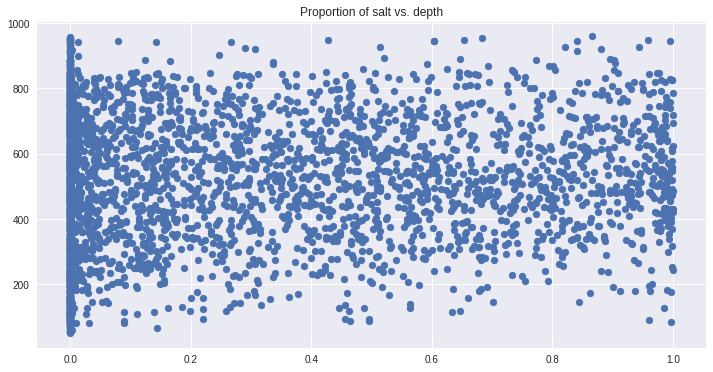

In [22]:
plt.figure(figsize = (12,6))
plt.scatter(merged['salt_proportion'],merged['z'])
plt.title('Proportion of salt vs. depth')

In [0]:
np.corrcoef(merged['salt_proportion'],merged['z'])[0][1]    # almost non-correlated

0.10361580365557428

In [0]:
# when it comes to computer vison, these methods outperfoms most of the time:
# AlexNet
# VGG-16, VGG-19
# Inception Nets
# ResNet
# Squeeze  Net

In [0]:
# When to use U-net:
#1. image classification tasks, when we need to segment areas of image by class, 如此处， for each pixel, predict it's 0 or 255
#2. many layers takes significatn time to train
#3. U net is designed as auto-encoder, but it predicts pixelwise segmentation map of input image
#4. "U shape" : encouding path(contracting) and decoding path(expanding)
#5. similiar to ResNet
 

In [0]:
convolution： 利用卷积操作来平滑一些噪点

ReLu: rectified linear unit 
ELU: exponential linear unit

batchnorm

maxpool(downsampling)

upsample

dropout



In [23]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K

Using TensorFlow backend.


In [0]:
x, y = dataset[1]

In [0]:
im_width = 128
im_height = 128
border = 5
im_chan = 2
n_features = 1

In [0]:
path_train

NameError: ignored

In [0]:
input_img = Input((im_height ,im_width, im_chan), name = 'img')
input_features = Input((n_features, ), name = 'feat')

c1 = Conv2D(8,(3,3), activation = 'relu', padding = 'same')(input_img)
# 8 is the the dimensionality of the output space (i.e. the number of output filters in the convolution)
# (3,3) is the size of the sliding window
# padding: one of 'valid' or 'same'
c1 = Conv2D(8,(3,3), activation = 'relu', padding = 'same')(c1)
p1 = MaxPooling2D((2,2))(c1)  # 128*128  --> 64*64  maxpooling的作用？


In [0]:
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2) # 32*32

In [0]:
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4) # 8*8

In [28]:
f_repeat = RepeatVector(8*8)(input_features)
f_conv = Reshape((8,8,n_features))(f_repeat)
p4_feat = concatenate([p4,f_conv], -1)  # why add this to p4?

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4_feat)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

#stride: : An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions
u6 = Conv2DTranspose(64,(2,2), strides=(2,2), padding = 'same')(c5)
#The need for transposed convolutions generally arises from the desire to use a transformation going in the opposite direction of a normal convolution, i.e., from something that has the shape of the output of some convolution to something that has the shape of its input while maintaining a connectivity pattern that is compatible with said convolution.



u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[input_img, input_features], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy') #, metrics=[mean_iou]) # The mean_iou metrics seens to leak train and test values...
model.summary()


# skip connection


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  152         img[0][0]                        
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 8)    0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [29]:
!pip install ipywidgets

    100% |████████████████████████████████| 112kB 2.6MB/s 
    100% |████████████████████████████████| 2.2MB 5.5MB/s 


In [30]:
import sys
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize


train_ids = next(os.walk(train_path+"images"))[2]


# Get and resize train images and masks
X = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.float32)
y = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)
X_feat = np.zeros((len(train_ids), n_features), dtype=np.float32)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = train_path
    
    # Depth
    #X_feat[n] = depth.loc[id_.replace('.png', ''), 'z']
    
    # Load X
    img = load_img(path + '/images/' + id_, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
    
    # Create cumsum x
    x_center_mean = x_img[border:-border, border:-border].mean()
    x_csum = (np.float32(x_img)-x_center_mean).cumsum(axis=0)
    x_csum -= x_csum[border:-border, border:-border].mean()
    x_csum /= max(1e-3, x_csum[border:-border, border:-border].std())

    # Load Y
    mask = img_to_array(load_img(path + '/masks/' + id_, grayscale=True))
    mask = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

    # Save images
    X[n, ..., 0] = x_img.squeeze() / 255
    X[n, ..., 1] = x_csum.squeeze()
    y[n] = mask / 255

print('Done!')

Getting and resizing train images and masks ... 


100%|██████████| 4000/4000 [00:21<00:00, 189.05it/s]

Done!


In [0]:
train_ids = next(os.walk(train_path+"images"))[2]
np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.float32)
y = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, X_feat_train, X_feat_valid, y_train, y_valid = train_test_split(X, X_feat, y, test_size=0.15, random_state=42)

In [33]:
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

results = model.fit({'img': X_train, 'feat': X_feat_train}, y_train, batch_size=16, epochs=50, callbacks=callbacks,
                    validation_data=({'img': X_valid, 'feat': X_feat_valid}, y_valid))

Train on 3400 samples, validate on 600 samples
Epoch 1/50
3400/3400 [==============================] - 280s 82ms/step - loss: 0.0381 - val_loss: 1.0000e-07

Epoch 00001: val_loss improved from inf to 0.00000, saving model to model-tgs-salt-1.h5
Epoch 2/50
3400/3400 [==============================] - 277s 82ms/step - loss: 1.0000e-07 - val_loss: 1.0000e-07

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/50
3400/3400 [==============================] - 279s 82ms/step - loss: 1.0000e-07 - val_loss: 1.0000e-07

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/50
3400/3400 [==============================] - 279s 82ms/step - loss: 1.0000e-07 - val_loss: 1.0000e-07

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/50
3400/3400 [==============================] - 278s 82ms/step - loss: 1.0000e-07 - val_loss: 1.0000e-07

Epoch 00005: val_loss did not improve from 0.00000
Epoch 6/50
34

In [2]:
results

NameError: ignored